In [4]:
from database.utils import get_reconstructed_probabilities
from models.SVM.binary_classification import get_best_estimators, get_scores_and_probs, optimise_score_over_channels
from models.scoring_metrics import scoring_function, print_scores_for_channel
from database.data import Data
from sklearn.svm import SVC
from tqdm import tqdm
import numpy as np


In [2]:
#creating DATA object
ptb_binary_SVM = Data(database = 'ptbdb', denoise_method='DWT', train_splits=None, binary = True, parameterisation = True)



# define hyperparameter grid to test
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale']#including 'auto' aswell takes forever
}


In [3]:
repeats = 10
best_scores = []
best_channels = []

for i in tqdm(range(repeats)):

    ptb_binary_SVM.run()


    #define classifier
    svc = SVC(class_weight='balanced', probability = True)

    #find the best set of hyperparameters for each channel, tuned on the desired scoring function
    best_estimators = get_best_estimators(ptb_binary_SVM.selected_features, param_grid, scoring_function, svc, ptb_binary_SVM.health_state, ptb_binary_SVM.nan_indices)

    #perform 3 way skfold to get scores for each channel as well as their probabilities
    n_splits = 3
    score, bal_acc, probabilities, thresholds, y_tests, test_indices = get_scores_and_probs(ptb_binary_SVM.selected_features, ptb_binary_SVM.health_state, ptb_binary_SVM.nan_indices, best_estimators, scoring_function, n_splits)

    #printing scores for each channel
    print_scores_for_channel(score, bal_acc)

    #reconstructing calculated probabilities so can optimise over all channels
    reconstructed_probs = get_reconstructed_probabilities(probabilities, test_indices, ptb_binary_SVM.nan_indices, ptb_binary_SVM.allowed_patients.count_patients(), n_splits)

    #optimising over channels
    best_score, best_channel_indices = optimise_score_over_channels(reconstructed_probs, thresholds, ptb_binary_SVM.health_state)

    print(best_score, best_channel_indices)

    best_scores.append(best_score)
    best_channels.append(best_channel_indices)


  0%|          | 0/10 [00:00<?, ?it/s]

Filtering Database


100%|██████████| 221/221 [00:01<00:00, 220.16it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'RMSSD', 'sd2', 'age']
Selected features for channel 2:
['rr_std', 'shannon_en', 'sd2', 'age']
Selected features for channel 3:
['rr_std', 'sd1', 'sd2', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'lf', 'age']
Selected features for channel 5:
['rr_std', 'lf', 'sd2', 'age']
Selected features for channel 6:
['rr_std', 'sd1', 'sd2', 'age']


 10%|█         | 1/10 [02:55<26:19, 175.53s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.6879069995867271  0.6920615178436783   
1  Balanced Accuracy  0.7351820728291316  0.7678310417440853   

            Channel 3           Channel 4           Channel 5  \
0  0.7534476728810603  0.7580388413015817  0.7277088343755009   
1  0.8084415584415584   0.671662210746392  0.7220458553791888   

            Channel 6  
0  0.7334452402106587  
1  0.7154318427903333  
0.8609351853509226 [0, 1, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 178.14it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'RMSSD', 'sd2', 'age']
Selected features for channel 2:
['rr_amps', 'lf', 'sd2', 'age']
Selected features for channel 3:
['rr_std', 'rr_amps', 'skews', 'age']
Selected features for channel 4:
['rr_std', 'rr_amps', 'skews', 'age']
Selected features for channel 5:
['rr_std', 'skews', 'lf', 'age']
Selected features for channel 6:
['rr_std', 'RMSSD', 'mean', 'age']


 20%|██        | 2/10 [06:18<25:32, 191.61s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.6879069995867271  0.7211656387480371   
1  Balanced Accuracy  0.7351820728291316  0.7112969156447417   

            Channel 3           Channel 4           Channel 5  \
0  0.7756898119801345  0.7068589379540242  0.7450816042195352   
1  0.7267316017316018  0.6804266501306279  0.7529100529100529   

            Channel 6  
0  0.7433291132190609  
1  0.7477313566936209  
0.8640067109302491 [0, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 124.92it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'lf', 'sd2', 'age']
Selected features for channel 2:
['rr_amps', 'lf', 'total_power', 'age']
Selected features for channel 3:
['rr_amps', 'skews', 'lf', 'age']
Selected features for channel 4:
['rr_std', 'rr_amps', 'sd_ratio', 'age']
Selected features for channel 5:
['skews', 'shannon_en', 'sd2', 'age']
Selected features for channel 6:
['mean', 'lf', 'sd2', 'age']


 30%|███       | 3/10 [09:28<22:18, 191.15s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.6375294506200967  0.7411032440680914   
1  Balanced Accuracy  0.6591783380018674  0.6907469342251952   

            Channel 3           Channel 4           Channel 5  \
0  0.7565374745248518   0.716265585314232  0.7258201058201057   
1  0.7187950937950939  0.6529388742617234  0.7322751322751323   

            Channel 6  
0  0.7368644396067543  
1  0.7400067961388715  
0.8468472497032054 [0, 1, 2, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 170.31it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'RMSSD', 'sd2', 'age']
Selected features for channel 2:
['rr_std', 'rr_amps', 'shannon_en', 'age']
Selected features for channel 3:
['rr_amps', 'skews', 'lf', 'age']
Selected features for channel 4:
['rr_std', 'rr_amps', 'sd_ratio', 'age']
Selected features for channel 5:
['skews', 'lf', 'shannon_en', 'age']
Selected features for channel 6:
['rr_std', 'mean', 'lf', 'age']


 40%|████      | 4/10 [12:24<18:28, 184.82s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.6879069995867271  0.7589996743631885   
1  Balanced Accuracy  0.7351820728291316  0.7381704446921837   

            Channel 3           Channel 4           Channel 5  \
0  0.7565374745248518    0.72447208704495   0.729058234230648   
1  0.7187950937950939  0.6530930524917574  0.7035273368606701   

            Channel 6  
0  0.7659729451238885  
1  0.7288956850277605  
0.8498818823034003 [0, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 206.57it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'mean', 'shannon_en', 'age']
Selected features for channel 2:
['rr_std', 'rr_amps', 'shannon_en', 'age']
Selected features for channel 3:
['rr_amps', 'skews', 'lf', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'lf', 'age']
Selected features for channel 5:
['lf', 'sd1', 'sd2', 'age']
Selected features for channel 6:
['rr_std', 'mean', 'sd1', 'age']


 50%|█████     | 5/10 [15:14<14:57, 179.59s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.7272896130876153  0.7589996743631885   
1  Balanced Accuracy  0.7087768440709618  0.7381704446921837   

            Channel 3           Channel 4           Channel 5  \
0  0.7565374745248518  0.7580388413015817  0.7194799147260055   
1  0.7187950937950939   0.671662210746392  0.7324514991181658   

            Channel 6  
0  0.7398898795125209  
1  0.7200428502315295  
0.8448497069372758 [0, 1, 2, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:02<00:00, 86.70it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'mean', 'lf', 'age']
Selected features for channel 2:
['rr_std', 'shannon_en', 'sd_ratio', 'age']
Selected features for channel 3:
['skews', 'sd1', 'sd2', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'skews', 'age']
Selected features for channel 5:
['rr_std', 'skews', 'shannon_en', 'age']
Selected features for channel 6:
['rr_std', 'pNN50', 'sd1', 'age']


 60%|██████    | 6/10 [19:29<13:41, 205.28s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.7239246218080847  0.7550561886318273   
1  Balanced Accuracy  0.6901960784313724  0.7381704446921837   

            Channel 3           Channel 4           Channel 5  \
0   0.762209145359933  0.7507550921172568  0.7182577472027013   
1  0.7932900432900433   0.668738754307672  0.7134038800705467   

            Channel 6  
0  0.7556114281674255  
1  0.7612216923537679  
0.8569323494540886 [2, 3, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 198.70it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'RMSSD', 'sd2', 'age']
Selected features for channel 2:
['rr_std', 'rr_amps', 'sd2', 'age']
Selected features for channel 3:
['rr_amps', 'skews', 'lf', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'sd_ratio', 'age']
Selected features for channel 5:
['lf', 'total_power', 'sd2', 'age']
Selected features for channel 6:
['rr_std', 'mean', 'sd1', 'age']


 70%|███████   | 7/10 [22:50<10:11, 203.79s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.6879069995867271  0.7255193629085707   
1  Balanced Accuracy  0.7351820728291316   0.729127957388827   

            Channel 3           Channel 4           Channel 5  \
0  0.7530844155844155  0.7451978479429914  0.7121689492434583   
1  0.7068903318903318  0.6758309528892322  0.7512345679012347   

            Channel 6  
0  0.7398898795125209  
1  0.7200428502315295  
0.8589360728968303 [0, 2, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 164.05it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'mean', 'sd2', 'age']
Selected features for channel 2:
['rr_amps', 'lf', 'sd_ratio', 'age']
Selected features for channel 3:
['shannon_en', 'sd1', 'sd2', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'skews', 'age']
Selected features for channel 5:
['skews', 'lf', 'sd2', 'age']
Selected features for channel 6:
['mean', 'sd1', 'sd2', 'age']


 80%|████████  | 8/10 [25:55<06:35, 197.86s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.7281122407978882  0.7472060031734333   
1  Balanced Accuracy  0.7393557422969188  0.7126470952557908   

            Channel 3           Channel 4           Channel 5  \
0  0.7484135030544895  0.7490237656004121  0.7367189021906002   
1  0.7952741702741702  0.6908336806579175  0.7393298059964727   

            Channel 6  
0  0.7453072653809114  
1  0.7605196166516922  
0.8589360728968303 [0, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 198.51it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'mean', 'shannon_en', 'age']
Selected features for channel 2:
['rr_std', 'rr_amps', 'lf', 'age']
Selected features for channel 3:
['rr_std', 'sd1', 'sd2', 'age']
Selected features for channel 4:
['rr_amps', 'std', 'skews', 'age']
Selected features for channel 5:
['skews', 'lf', 'shannon_en', 'age']
Selected features for channel 6:
['rr_std', 'RMSSD', 'lf', 'age']


 90%|█████████ | 9/10 [28:40<03:07, 187.52s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.7150618575535765  0.7212158798859566   
1  Balanced Accuracy  0.6869281045751633  0.7186238077542425   

            Channel 3           Channel 4           Channel 5  \
0  0.7542496586101236  0.7490237656004121   0.729058234230648   
1  0.7602813852813853  0.6908336806579175  0.7035273368606701   

            Channel 6  
0  0.7336641898681527  
1  0.7383590204344922  
0.871675585284281 [1, 4, 5]
Filtering Database


100%|██████████| 221/221 [00:01<00:00, 186.03it/s]


denoising signals through Discrete Wavelet Transform
normalising signals
calculating time domain parameters
calculating frequency domain parameters
calculating non linear domain parameters
selecting 4 most important features
Selected features for channel 1:
['rr_amps', 'mean', 'lf', 'age']
Selected features for channel 2:
['rr_amps', 'lf', 'total_power', 'age']
Selected features for channel 3:
['rr_std', 'sd1', 'sd2', 'age']
Selected features for channel 4:
['rr_std', 'rr_amps', 'std', 'age']
Selected features for channel 5:
['rr_std', 'lf', 'total_power', 'age']
Selected features for channel 6:
['rr_std', 'sd1', 'sd2', 'age']


100%|██████████| 10/10 [30:50<00:00, 185.03s/it]

      Success Metric           Channel 1           Channel 2  \
0    Objective Score  0.7150618575535765  0.7472060031734333   
1  Balanced Accuracy  0.6758169934640522  0.7126470952557908   

            Channel 3           Channel 4           Channel 5  \
0  0.7534476728810603  0.7229860592823266  0.6220481544571136   
1  0.8084415584415584  0.6637313503640979  0.6592592592592593   

            Channel 6  
0  0.7348499665952496  
1  0.7343268366853272  
0.8589360728968303 [2, 3, 4, 5]


In [5]:
print(np.mean(best_scores))
print(np.std(best_scores))

print(best_channels)

0.8571936888653914
0.007695470112347294
[[0, 1, 4, 5], [0, 4, 5], [0, 1, 2, 4, 5], [0, 4, 5], [0, 1, 2, 4, 5], [2, 3, 4, 5], [0, 2, 4, 5], [0, 4, 5], [1, 4, 5], [2, 3, 4, 5]]


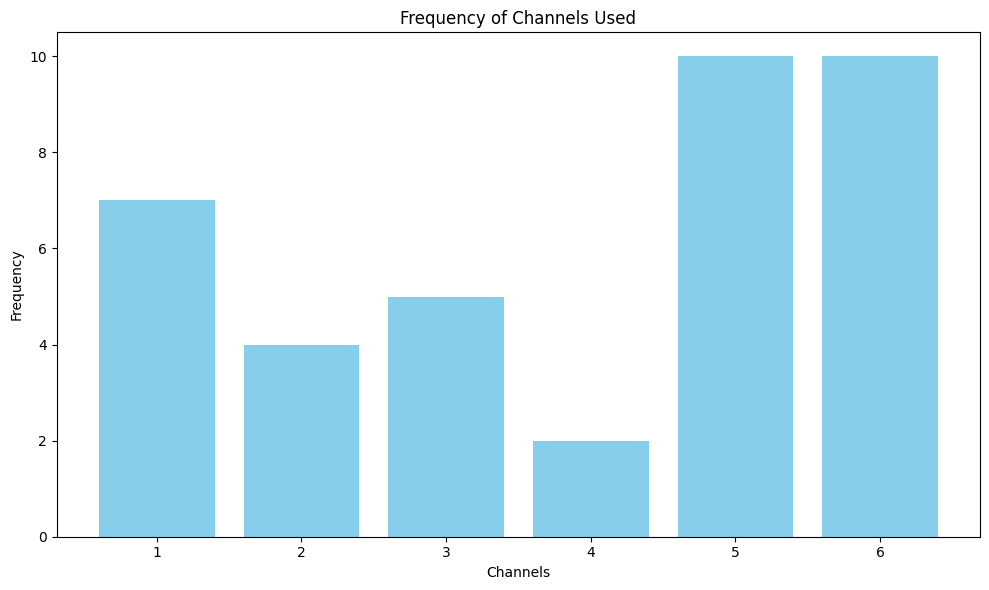

In [14]:
import matplotlib.pyplot as plt
from collections import Counter


# Flatten the list of lists
flattened_list = [number for sublist in best_channels for number in sublist]

# Count the occurrences of each number
counted_numbers = Counter(flattened_list)

# Sort the numbers to maintain a consistent order in the plot
sorted_numbers = sorted(counted_numbers.keys())
counts = [counted_numbers[number] for number in sorted_numbers]

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(sorted_numbers, counts, color='skyblue')

# Adding labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Channels Used')
ax.set_xticks(sorted_numbers)
ax.set_xticklabels([1, 2, 3, 4, 5, 6])

# Show the plot
plt.tight_layout()
plt.savefig('figures\\number_frequency_bar_chart.png', bbox_inches='tight')
plt.show()